In [ ]:
'''
ABC-анализ — это широко используемая практика группировки запасов, которая делит запасы на категории на основе двух факторов: 
стоимости за единицу и количества, находящегося на складе. 
ABC Analysis делит запасы на три основные группы, что позволяет применять различные методы управления запасами 
к различным сегментам запасов, чтобы увеличить доход и снизить затраты.

Предметы категории А обычно составляют примерно 15–20 % от общего запаса по каждому предмету, составляют 80 % стоимости запаса. 
К товарам этой категории относятся товары, стоимость годового потребления которых является самой высокой.

Предметы категории B составляют 30–35 % товарно-материальных запасов по типу и около 15 % стоимости. 
Товары этой категории относятся к товарам средней потребительской ценности.

Предметы категории C представляют собой 50% фактических предметов, но только 5% стоимости запасов. 
Товары в этой категории представляют собой товары с наименьшей потребительской ценностью.

Этапы ABC-анализа:
Шаг 1. Рассчитайте годовые затраты на все, умножив стоимость единицы продукции на годовую потребность в единице продукции.
Шаг 2. Отсортируйте инвентарь в порядке убывания годовых расходов.
Шаг 3. Рассчитайте совокупные годовые расходы и процент расходов.
Шаг 4. Разделите инвентарь на классы
Шаг 5. Проанализируйте занятия и примите соответствующие решения.
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('SalesKaggle3.csv')
data.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [3]:
def ABC_segmentation(perc):
    '''
    Создадим три класса A, B, и C 
    с разделением в процентном отмошении (A-60%, B-25%, C-15%)
    '''
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [4]:
# Возьмем подмножество данных, используя цену и количество каждого товара

data_sub = data[['SKU_number','PriceReg','ItemCount','File_Type']][(data['File_Type'] == 'Historical')]

# Создадим столбец аддитивной стоимости по SKU

data_sub['AddCost'] = data_sub['PriceReg'] * data_sub['ItemCount']

# Заказ по совокупной стоимости

data_sub = data_sub.sort_values(by=['AddCost'], ascending=False)

# Создадим столбец текущей кумулятивной стоимлсти SKU

data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()

# Создадим столбец общей суммы

data_sub['TotSum'] = data_sub['AddCost'].sum()

# Создадим столбец текущего процента

data_sub['RunPerc'] =  data_sub['RunCumCost']/data_sub['TotSum']

# Создадим столбец класса

data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

data_sub.sample(10)

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class
70917,617142,67.40,41,Historical,2763.40,2.844480e+08,3.426320e+08,0.830185,B
51464,2604560,88.99,18,Historical,1601.82,3.207681e+08,3.426320e+08,0.936188,C
31608,162697,55.00,28,Historical,1540.00,3.225453e+08,3.426320e+08,0.941375,C
68514,867112,106.20,53,Historical,5628.60,2.092600e+08,3.426320e+08,0.610743,B
35936,869420,218.67,23,Historical,5029.41,2.228609e+08,3.426320e+08,0.650438,B
16906,2353662,52.99,32,Historical,1695.68,3.180490e+08,3.426320e+08,0.928252,C
28007,428377,151.80,55,Historical,8349.00,1.623581e+08,3.426320e+08,0.473856,A
21804,804435,121.71,26,Historical,3164.46,2.721935e+08,3.426320e+08,0.794419,B
69163,110733,296.00,104,Historical,30784.00,3.043979e+07,3.426320e+08,0.088841,A
56769,655087,79.99,24,Historical,1919.76,3.111792e+08,3.426320e+08,0.908202,C


In [5]:
# Общее количество SKU для каждого класса

data_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [6]:
# Общая стоимость за класс

print ('Общая стоимость за класс A :', data_sub[data_sub.Class == 'A']['AddCost'].sum())
print ('Общая стоимость за класс B :', data_sub[data_sub.Class == 'B']['AddCost'].sum())
print ('Общая стоимость за класс C :', data_sub[data_sub.Class == 'C']['AddCost'].sum())

Общая стоимость за класс A : 205577451.4
Общая стоимость за класс B : 85658215.25999999
Общая стоимость за класс C : 51396361.129999995


In [7]:
# Процент от общей стоимости за класс

print ('Процент от общей стоимости за класс A :', data_sub[data_sub.Class == 'A']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Процент от общей стоимости за класс B :', data_sub[data_sub.Class == 'B']['AddCost'].sum()/data_sub['AddCost'].sum())
print ('Процент от общей стоимости за класс C :', data_sub[data_sub.Class == 'C']['AddCost'].sum()/data_sub['AddCost'].sum())

Процент от общей стоимости за класс A : 0.5999948479013728
Процент от общей стоимости за класс B : 0.2500006079773141
Процент от общей стоимости за класс C : 0.15000454412131298


In [ ]:
'''
Подведем итоги
В следующей таблице приведены сводные результаты трех разных классов.

Класс Всего SKU Общая стоимость ($) Количество Процент Стоимость Процент
А     16295     205577451               21%                60%
Б     22288     85658215                30%                25%
С     37413     51396361                49%                15%
Итого 75996     342632027               100%               100%

Предметы категории А составляют 21% от общего количества запасов по позициям и составляют 60% стоимости запасов. 
Предметы категории B составляют 30% товарно-материальных запасов по каждому предмету и около 25% стоимости. 
Наконец, предметы категории C составляют 49% фактических предметов, но только 15% стоимости запасов.
'''

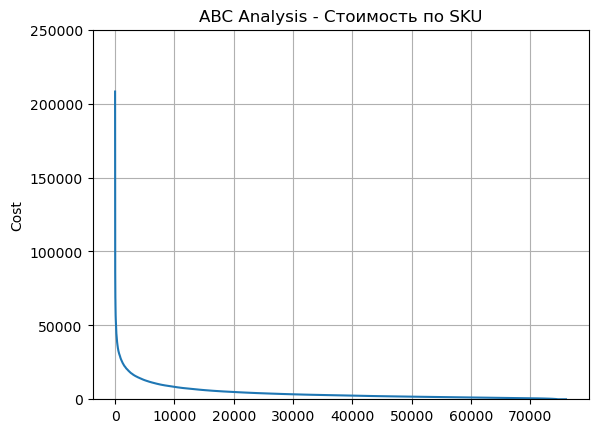

In [9]:
performance = data_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Стоимость по SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

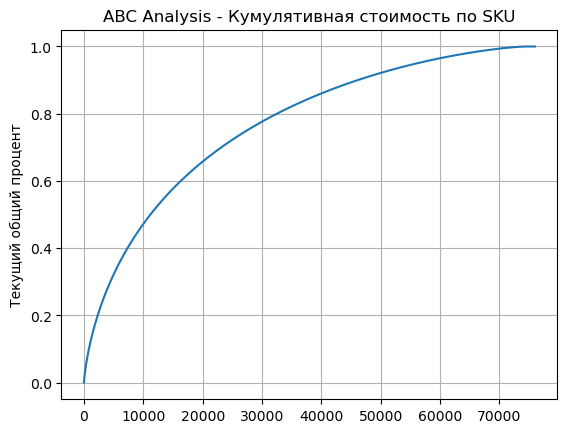

In [10]:
performance = data_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Текущий общий процент')
plt.title('ABC Analysis - Кумулятивная стоимость по SKU')
plt.grid(True)
plt.show()